# Plot
## include 
 - top k
 - density plot of CV
 - normalization distribution from xugang
 - single cell experiment two plots
 
## parameter
### input: matrix path of each process
### output: plot files


## common function

In [1]:
library(magrittr)

In [3]:
as_SingleCellExperiment <- function(mat, col_data = NULL) {
    assays = list(counts = as.matrix(mat))
    if (is.null(col_data))
    SingleCellExperiment::SingleCellExperiment(assays = assays)
    else
    SingleCellExperiment::SingleCellExperiment(assays = assays, colData = col_data)
}

In [ ]:
mat_filter_path='output/scirep/matrix_processing/filter.domains_combined.txt'
file_path = "output/scirep/matrix_processing/"
mat_list = c("Norm_CPM","Norm_CPM_refer","Norm_CPM_rm","Norm_CPM_top","Norm_RLE","Norm_SCnorm","Norm_TMM")
batchinfo_path= "data/scirep/batch_info.txt"
classinfo_path = "data/scirep/sample_classes.txt"
batchinfo_path = "data/scirep/batch_info.txt"
refer_gene_id_path ="data/scirep/reference_genes.txt"
refer_gene_name_path ="data/scirep/reference_genes_name.txt"
## plot cv using SCnorm mx
cv_mat_path = "filter.scimpute_count.Norm_SCnorm.domains_combined.txt"


## plot_highest_exprs plot

In [22]:
plot_highest_exprs <- function(mat_filter_path=mat_filter_path, top_n = 20,png_out_path='png/'){
    mat <- read.table(mat_filter_path,sep='\t',header=TRUE,check.names = FALSE)
    resfactor = 3 
    #png(paste(png_out_path,'plot_highest_exprs.png',sep=''),res = 72*resfactor, height=640*resfactor, width=640*resfactor)
    
    mat %>% as_SingleCellExperiment() %>% {suppressMessages(scater::calculateQCMetrics(.))} %>% scater::plotHighestExprs(n = top_n)
    #dev.off()
}

[1] 89619   191


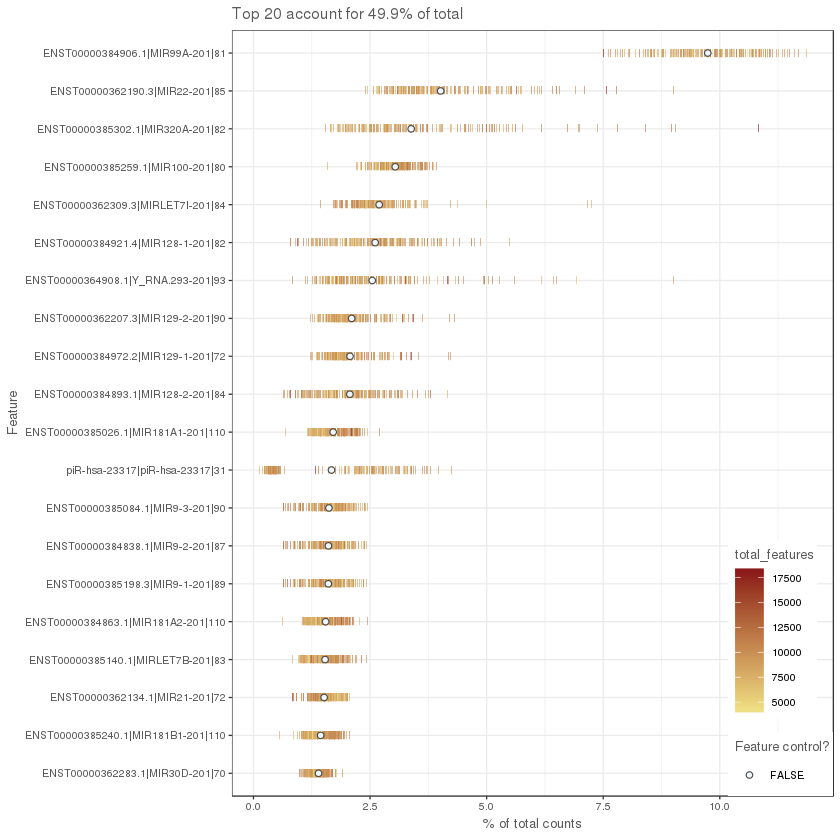

In [23]:
plot_highest_exprs()


## count_depth plot

In [78]:
count_depth_norm <- function(mat_list=mat_list,
                               pdf_out_path=file_path,
                            file_path = file_path){
    allmat=mat_list
    library(SCnorm)
    mat_unnorm=read.table(paste(file_path,"scimpute_count.txt",sep=""),header=TRUE,check.names = FALSE)
    resfactor = 3 
    for(i in mat_list){
        if(!(i %in% allmat)){
            warning(paste('Check input: ',i,'\tThis normlized matrix is not found\n'))
            next
        }
        
        mat=read.table(paste(file_path,"filter.scimpute_count.",i,".domains_combined.txt",sep=""),header=TRUE,check.names = FALSE)
        
        #png(paste(pdf_out_path,i,'_count_depth.png',sep=''),res = 72*resfactor, height=640*resfactor, width=640*resfactor)
        Conditions = rep(c(1), each= dim(mat)[2])
        countDeptEst <- plotCountDepth(Data = as.matrix(mat_unnorm), NormalizedData = as.matrix(mat), Conditions = Conditions,
                                       FilterCellProportion = .1, NCores=3)
        print(paste(i," count_depth png produced..."))
        #dev.off()
    }
}


In [35]:
count_depth_unnorm <- function(mat_list='mat_impute',
                               pdf_out_path=file_path,
                               file_path = file_path){
    allmat='mat_impute'
    library(SCnorm)
    resfactor = 3 
    for(i in mat_list){
        if(!(i %in% allmat)){
            warning(paste('Check input: ',i,'\tThis matrix is not found\n'))
            next
        }
        mat=read.table(paste(file_path,"scimpute_count.txt",sep=""))
        #png(paste(pdf_out_path,i,'_count_depth.png',sep=''),res = 72*resfactor, height=640*resfactor, width=640*resfactor)
        Conditions = rep(c(1), each= dim(mat)[2])
        countDeptEst <- plotCountDepth(Data = mat, Conditions = Conditions,
                                       FilterCellProportion = .1, NCores=3)
        #dev.off()
    }
}

[1] "mat_scnorm  count_depth png produced..."


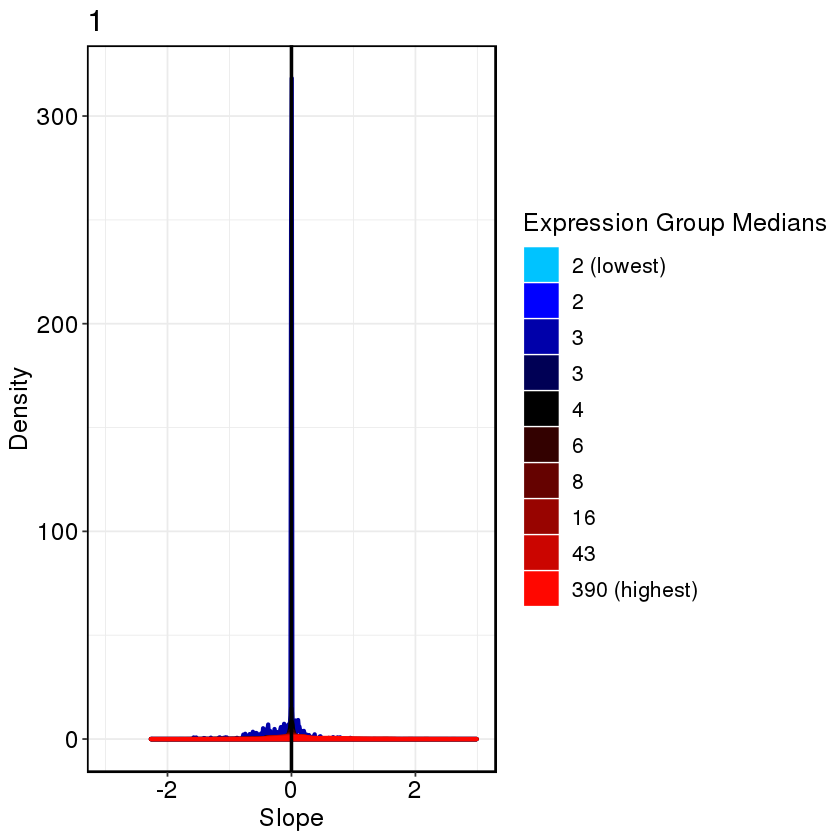

[1] "mat_tmm  count_depth png produced..."


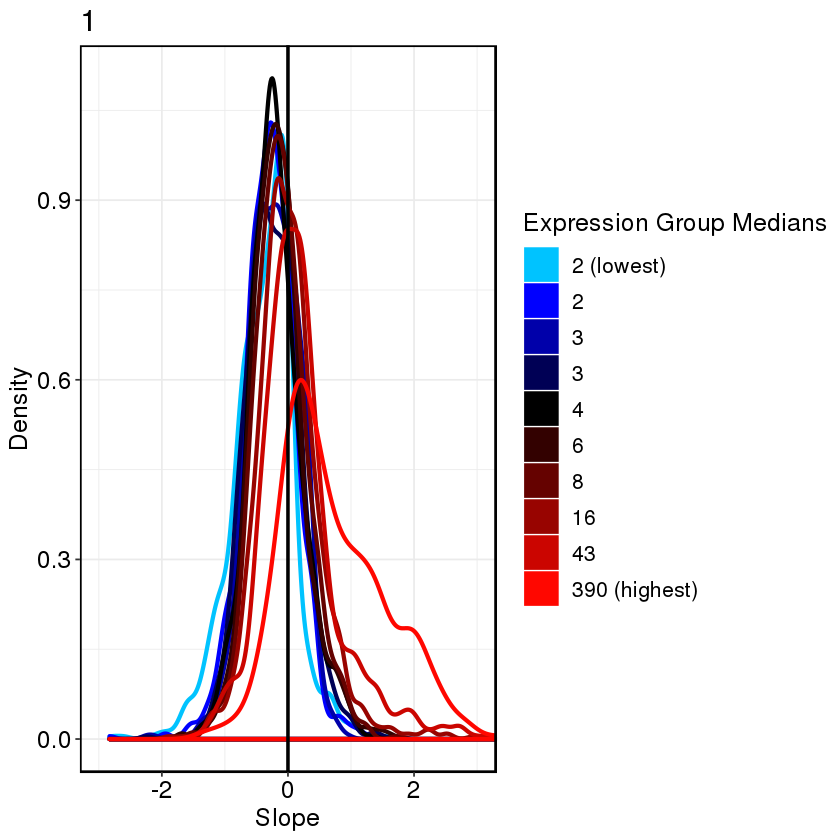

[1] "mat_rle  count_depth png produced..."


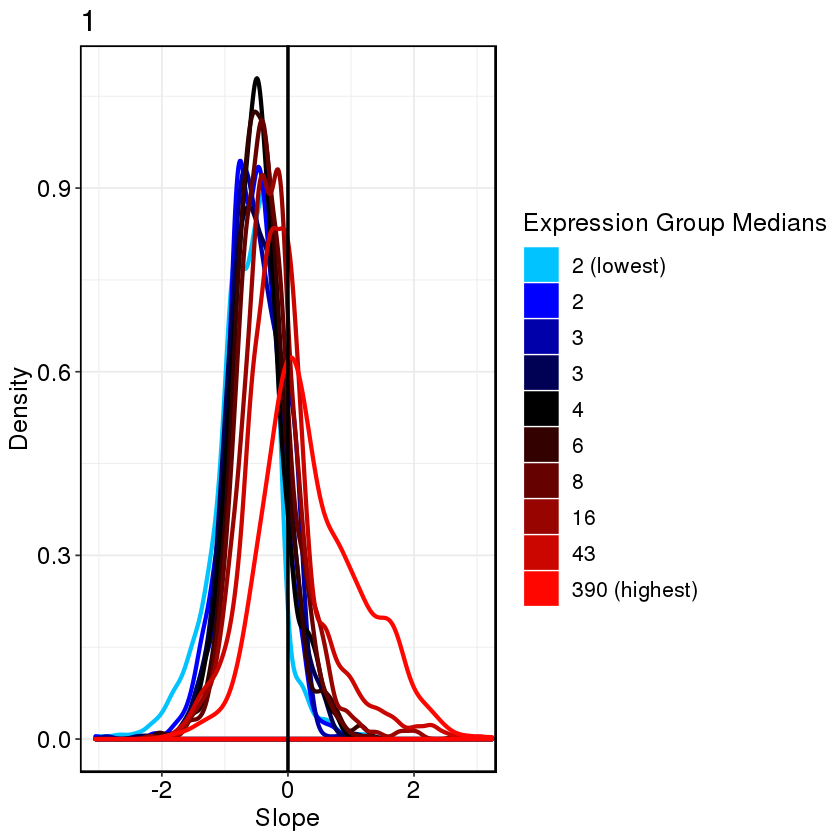

[1] "mat_cpm  count_depth png produced..."


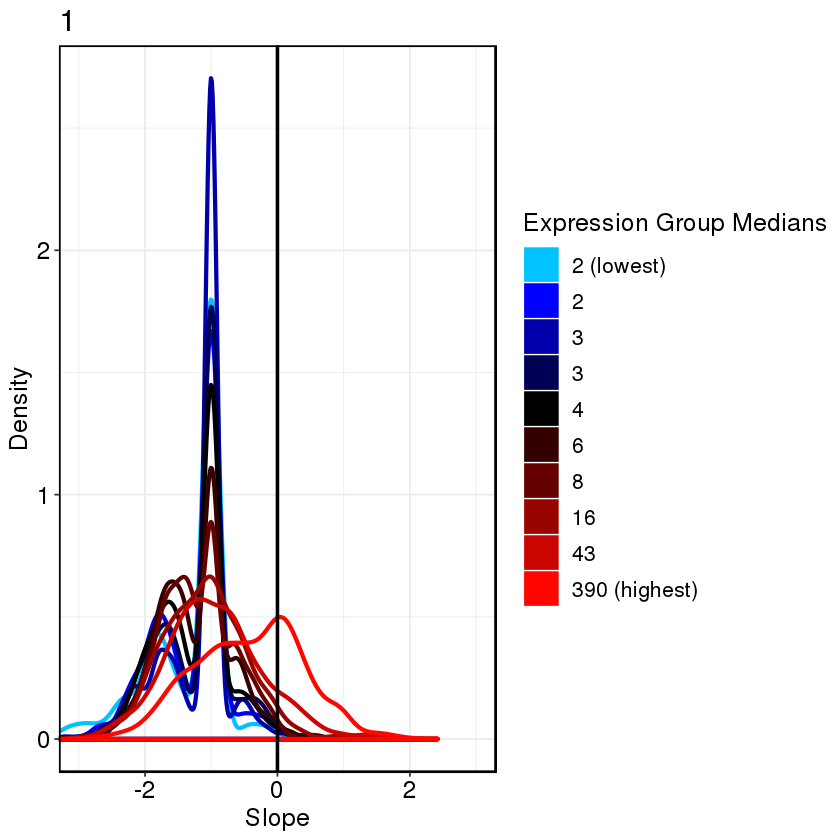

[1] "mat_cpm_top  count_depth png produced..."


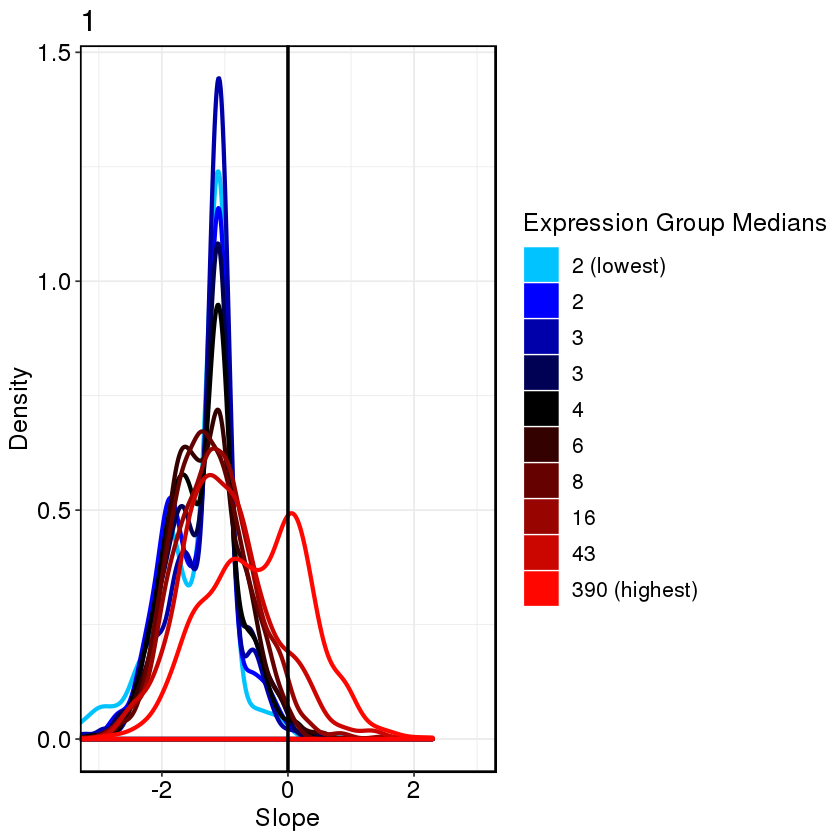

[1] "mat_cpm_rm  count_depth png produced..."


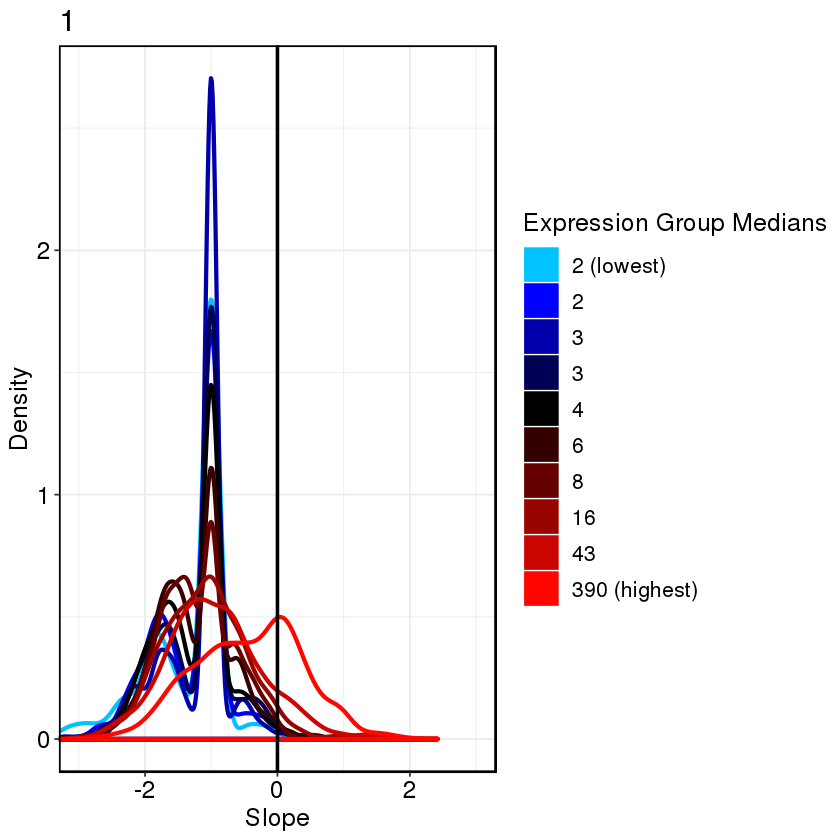

[1] "mat_cpm_refer  count_depth png produced..."


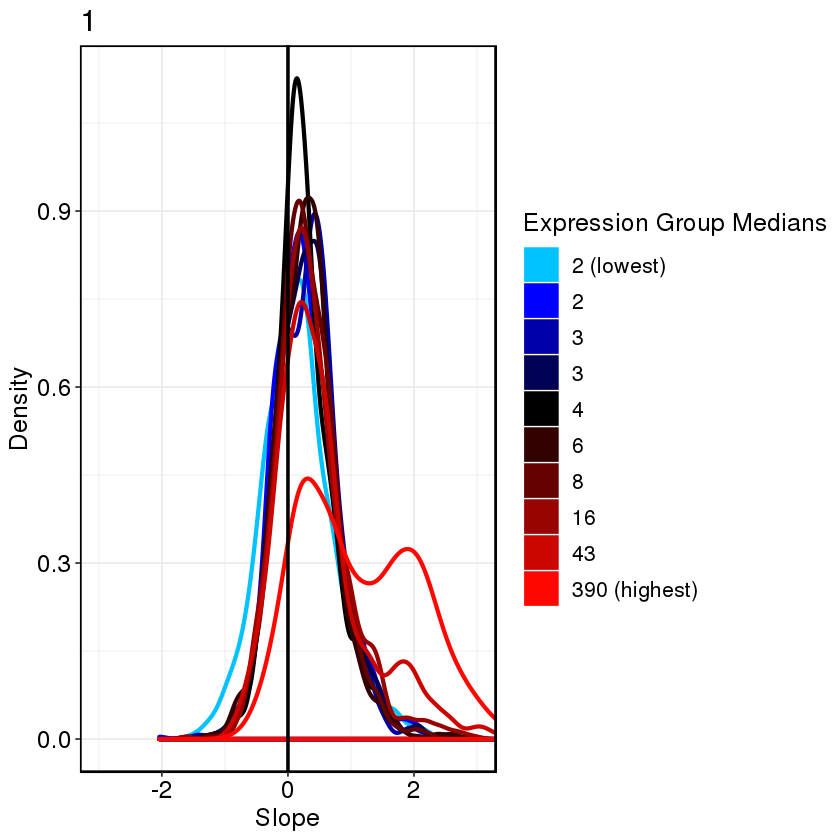

In [79]:
count_depth_norm()

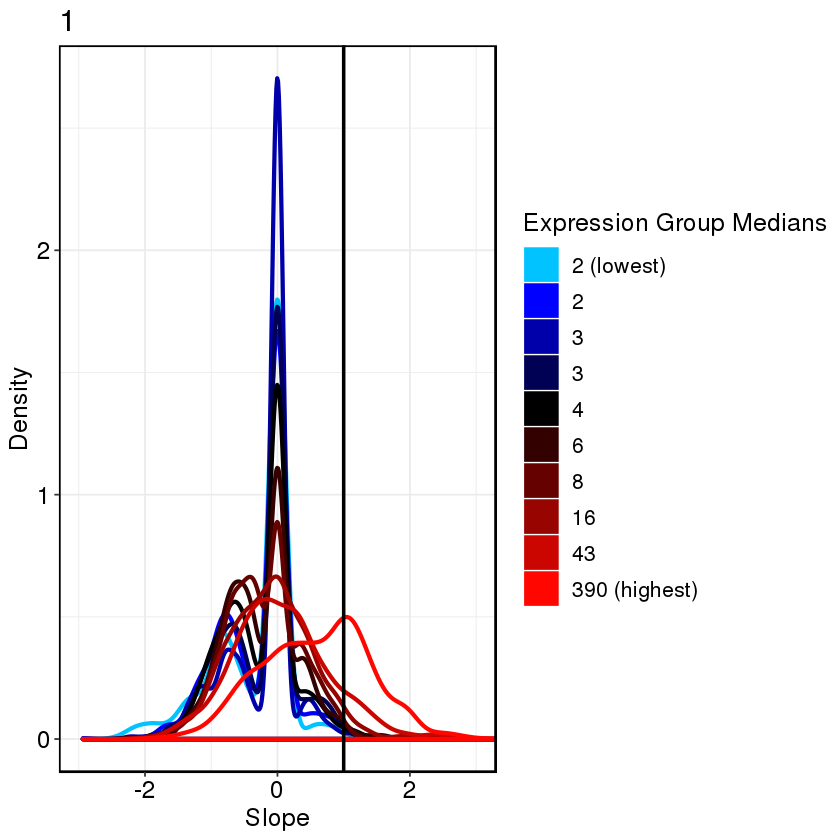

In [38]:
count_depth_unnorm()

## RLE

In [72]:
filter_low <- function(mat, min_count = 5, min_sample_per_gene = 10) {
    print(paste('start filtering lowly expressed gene:','count threshold',min_count,'sample threshold',min_sample_per_gene,sep=' '))
    low_per_row <- rowSums(mat > min_count)
    keeped_row <- low_per_row > min_sample_per_gene
    mat[keeped_row, ]
}

In [76]:
RLE_plot <- function(mat_list=mat_list,pdf_out_path=file_path,file_path=file_path,classinfo_path=classinfo_path){
    allmat=mat_list
   # mat_raw=read_mat("/home/xieyufeng/exSeek/data/transcript.txt")
   # mat_filter=filter_low(mat_raw,5, 10)
    mat_filter=read.table(paste(file_path,"filter.scimpute_count.domains_combined.txt",sep=''),sep='\t',header=TRUE,check.names = FALSE)
    mat_impute=read.table(paste(file_path,"scimpute_count.txt",sep=""))
    sample_info <-read.csv(classinfo_path,sep='\t')
    for(i in allmat)
        assign(i,read.table(paste(file_path,"filter.scimpute_count.",i,".domains_combined.txt",sep=""),header=TRUE))
    reads <- SingleCellExperiment::SingleCellExperiment(
        assays = list(#counts = as.matrix(mat_raw),
                      Filter = as.matrix(mat_filter),
                      Impute = as.matrix(mat_impute),
                      CPM = as.matrix(Norm_CPM),
                      CPM_refer = as.matrix(Norm_CPM_refer),
                      CPM_rm = as.matrix(Norm_CPM_rm),
                      CPM_top = as.matrix(Norm_CPM_top),
                      RLE = as.matrix(Norm_RLE),
                      SCnorm = as.matrix(Norm_SCnorm),
                      TMM = as.matrix(TMM)),
        colData = sample_info )
  #  reads <-  scater::calculateQCMetrics(reads)
    
    res <- list()
    for(n in SummarizedExperiment::assayNames(reads)) {
        res[[n]] <- suppressWarnings(scRNA.seq.funcs::calc_cell_RLE(SummarizedExperiment::assay(reads, n)))
    }
    resfactor = 3 
  #  png(paste(pdf_out_path,'RLE.png',sep=''),res = 72*resfactor, height=640*resfactor, width=640*resfactor)
    par(mar=c(6,4,1,1))
    boxplot(res, las=2,main="RLE of each process",ylab="relative log expression",cex.axis=0.7)
   # dev.off()
}

[1] "start filtering lowly expressed gene: count threshold 5 sample threshold 10"


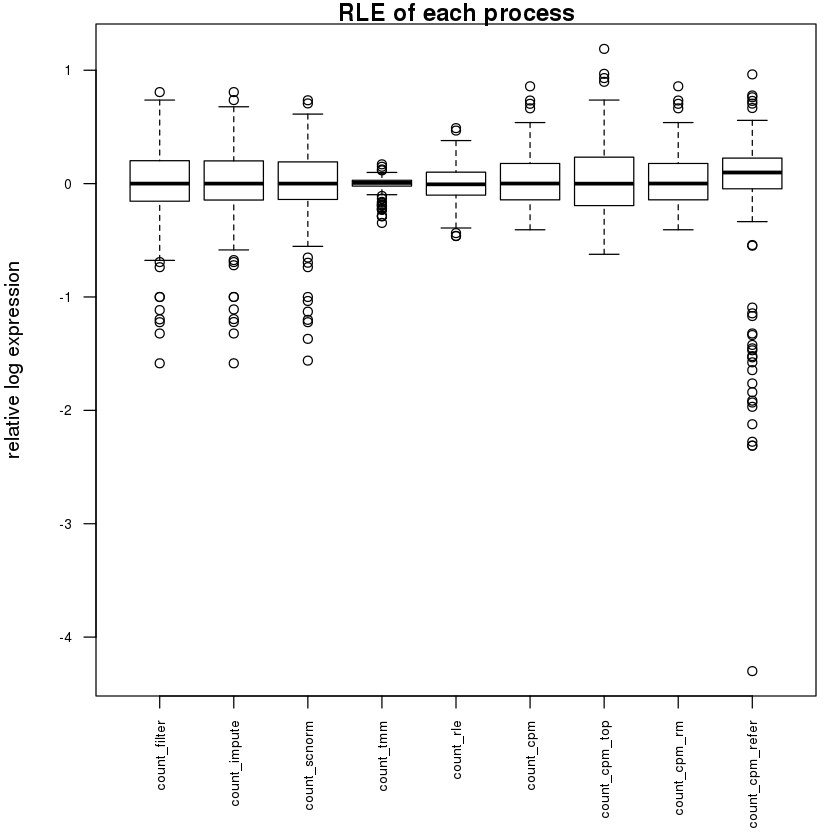

In [77]:
RLE_plot()

In [75]:
help(assay)

## cv density

In [65]:
plot_cv_density <- function(cv_mat_path=cv_mat_path, 
                            refer_gene_id_path = refer_gene_id_path, refer_gene_name_path = refer_gene_id_path) {
    refer_gene_id <- read.table(refer_gene_id_path)[,1]
    refer_gene_name <- read.table(refer_gene_name_path)[,1]
    mat=read.table(cv_mat_path,head=TRUE,check.names = FALSE)
    cv <- mat %>% apply(1, cv_fun) %>%
    {tibble::tibble(id = names(.), value = .)} %>%
    dplyr::mutate(id = stringr::str_extract(id, '[^|]+'))
    plot <- ggplot2::ggplot(cv, ggplot2::aes(value)) +
    ggplot2::geom_density(color = '#5F7AB3') +
    ggplot2::labs(x = 'coefficient of variation')
    
    if (length(refer_gene_id) != length(refer_gene_name)) {
        warning("Ignoring refer_gene_name, since it isn't the same length as refer_gene_id")
        refer_gene_name = refer_gene_id
    }
    cv_refer <- tibble::tibble(id = refer_gene_id, name = refer_gene_name) %>%
    dplyr::inner_join(cv, by = 'id')
    if (nrow(cv_refer) == 0L) {
        warning("None refer gene found in the count matrix")
        return(plot)
    }
    
    plot + ggplot2::geom_vline(xintercept = cv_refer$value, color = '#93C991') +
    ggplot2::geom_point(
    ggplot2::aes(x = value, y = seq_y(plot, value)),
    data = cv_refer, size = 2, shape = 1
    ) +
    ggrepel::geom_label_repel(
    ggplot2::aes(x = value, y = seq_y(plot, value), label = name),
    data = cv_refer, hjust = 0.5
    )
}

In [69]:
seq_y <- function(plot, x) {
    y_range <- get_y_range(plot)
    by <- diff(y_range) / length(x)
    seq(y_range[1] + by, y_range[2], by) - by/2
}
get_y_range <- function(plot) {
    ggplot2::ggplot_build(plot)$layout$panel_params[[1]]$y.range
}
cv_fun <- function(x) {
    sd(x, na.rm = T) / mean(x, na.rm = T)
}
#5F7AB3 #93C991

Warning message:
“Column `id` joining factor and character vector, coercing into character vector”

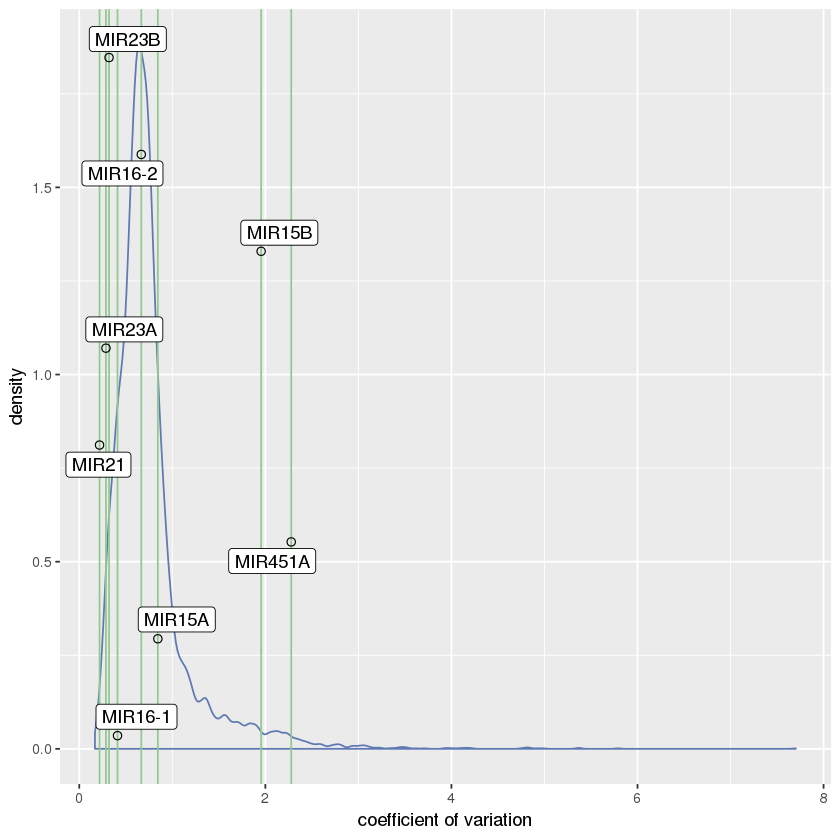

In [71]:
plot_cv_density()

In [68]:
#refer_gene_gid_path='data/matrix_processing/refer_gene_gid.txt'

#refer_gene_tid_path='data/matrix_processing/refer_gene_tid.txt'

#refer_gene_name_path='data/matrix_processing/refer_gene_name.txt'


## anno variables contribute variance plot

In [63]:

anno_contri_var <-function(pdf_out_path=file_path,
                          batchinfo_path =batchinfo_path ,
                          classinfo_path = classinfo_path,
                           mat_path=cv_mat_path
                          ){
    mat <- read.table(mat_path,header=TRUE,check.names = FALSE)
    batch_info <- read.csv(batchinfo_path,sep='\t')
    sample_info <-read.csv(classinfo_path,sep='\t')
    anno_info <- merge(sample_info,batch_info,by='sample_id',all=T)
    rownames(anno_info)=anno_info$sample_id
    anno_info <- anno_info[names(mat),]
    rownames(anno_info) <-c()

    anno_info$class <- 0
    for(i in seq_len(length(table(anno_info$label)))){
        anno_info[which(anno_info$label==names(table(anno_info$label))[i]),]$class <- i
    }
    
    reads <- SingleCellExperiment::SingleCellExperiment(
        assays = list(counts = as.matrix(mat)),
        colData = anno_info
    )
    reads <-  scater::calculateQCMetrics(reads)
    resfactor =3
    #png(paste(pdf_out_path,'anno_variables_contribute_variance.png',sep=''),res = 72*resfactor, height=640*resfactor, width=640*resfactor)
    for(n in SummarizedExperiment::assayNames(reads)) {
        print(
            scater::plotQC(
                reads,
                type = "expl",
                exprs_values = n,
                variables = c(
                    "total_features",
                    "total_counts",
                    "class",
                    'RNA.Isolation.batch',
                    'library.prepration.day',
                    'gel.cut.size.selection'
                )
            ) +
            ggplot2::ggtitle(n)
        )
    }
    #dev.off()
}

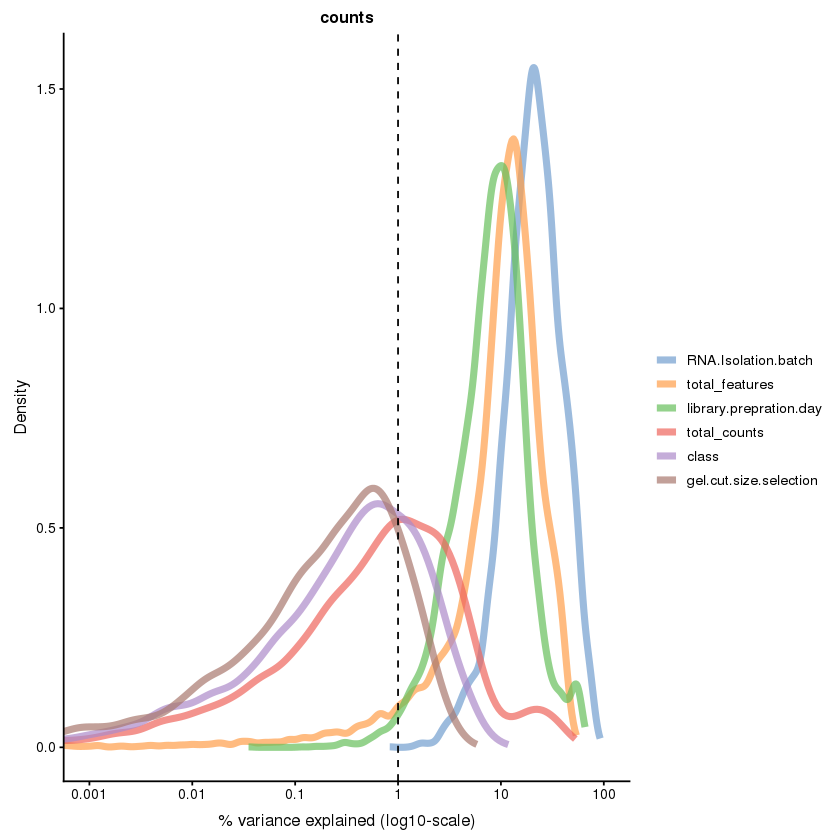

In [64]:
anno_contri_var()